In [1]:
import numpy as np
import pandas as pd
import sys

import matplotlib.pyplot as plt
plt.style.use(["seaborn-darkgrid", "seaborn-colorblind", "seaborn-notebook"])

In [2]:
raw_df = pd.read_csv("./data/chu2016Data.csv", header='infer', index_col=0, sep=",", encoding=sys.getfilesystemencoding())

In [3]:
cell_stages = raw_df['Stage'].astype('int').values

In [4]:
raw_df = raw_df.drop('Stage',1)

Dimension reduction with locally_linear_embedding(LLE).



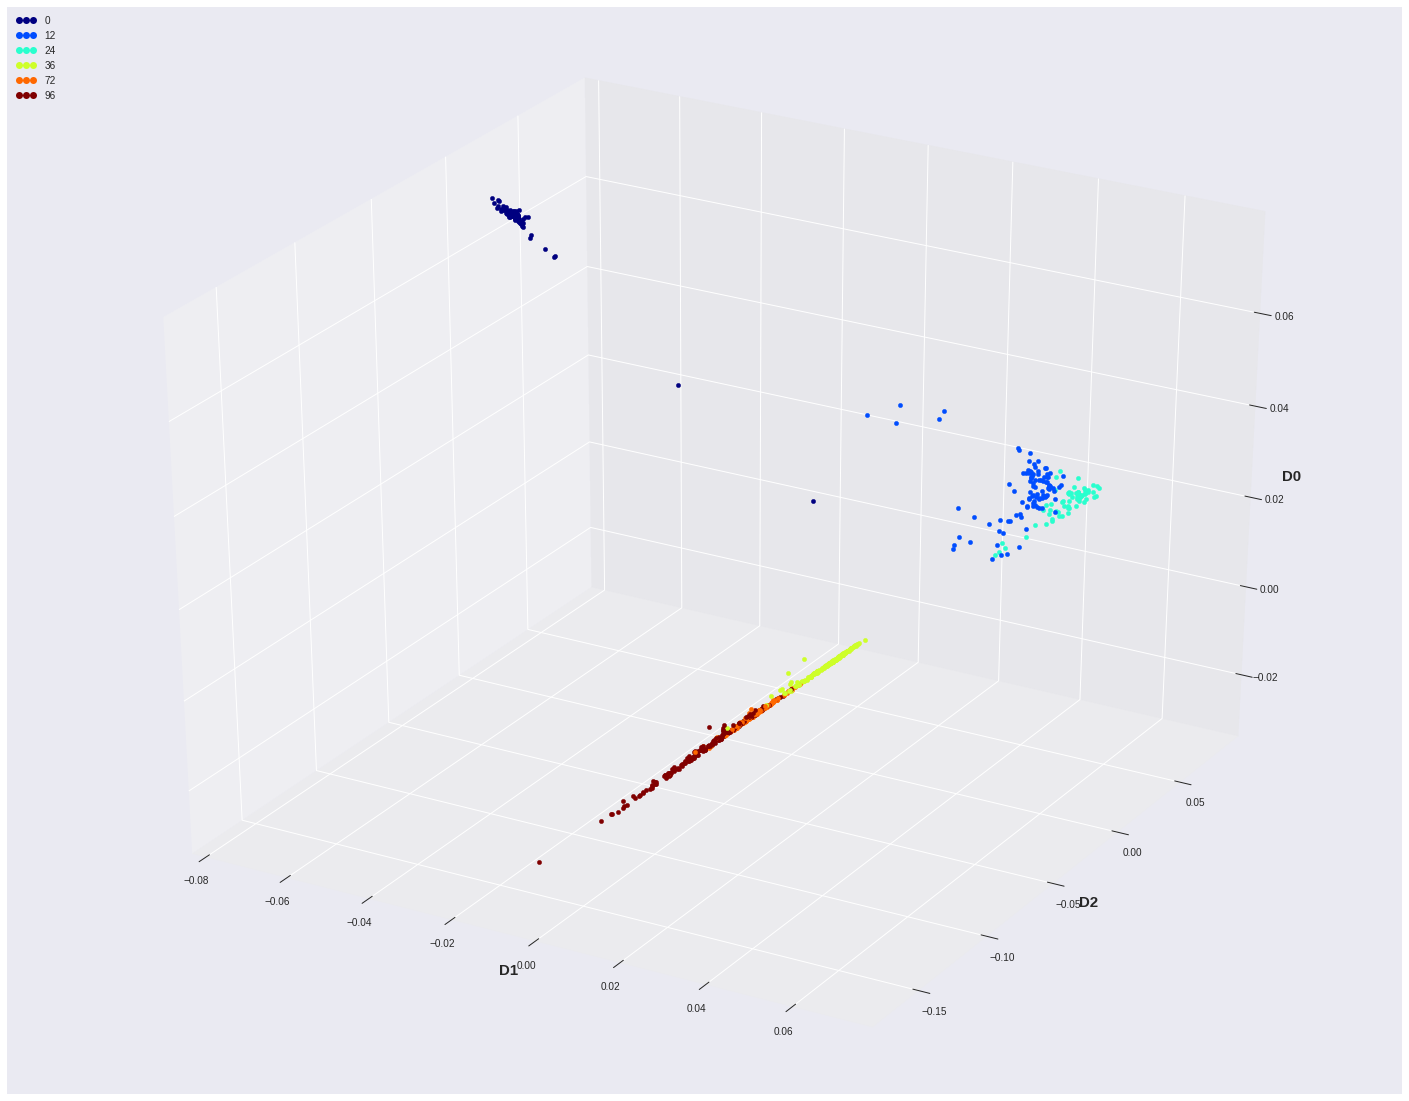

In [5]:
from SCOUT import *
Z = SCOUT(raw_df, stages=cell_stages)
V = Z.dim_down(ndim=3,method='lle',rand_seed=6)
Z.plotD(V,dims=[1,2,0])

Clustering with Gaussian Mixture
branches:
 [[12, 2, 7, 13, 0, 9, 5, 3, 6], [12, 2, 7, 13, 0, 10, 8, 4, 11], [6, 3, 5, 9, 0, 10, 8, 4, 11], [6, 3, 5, 9, 0, 13, 1], [11, 4, 8, 10, 0, 13, 1], [12, 2, 7, 13, 1]]


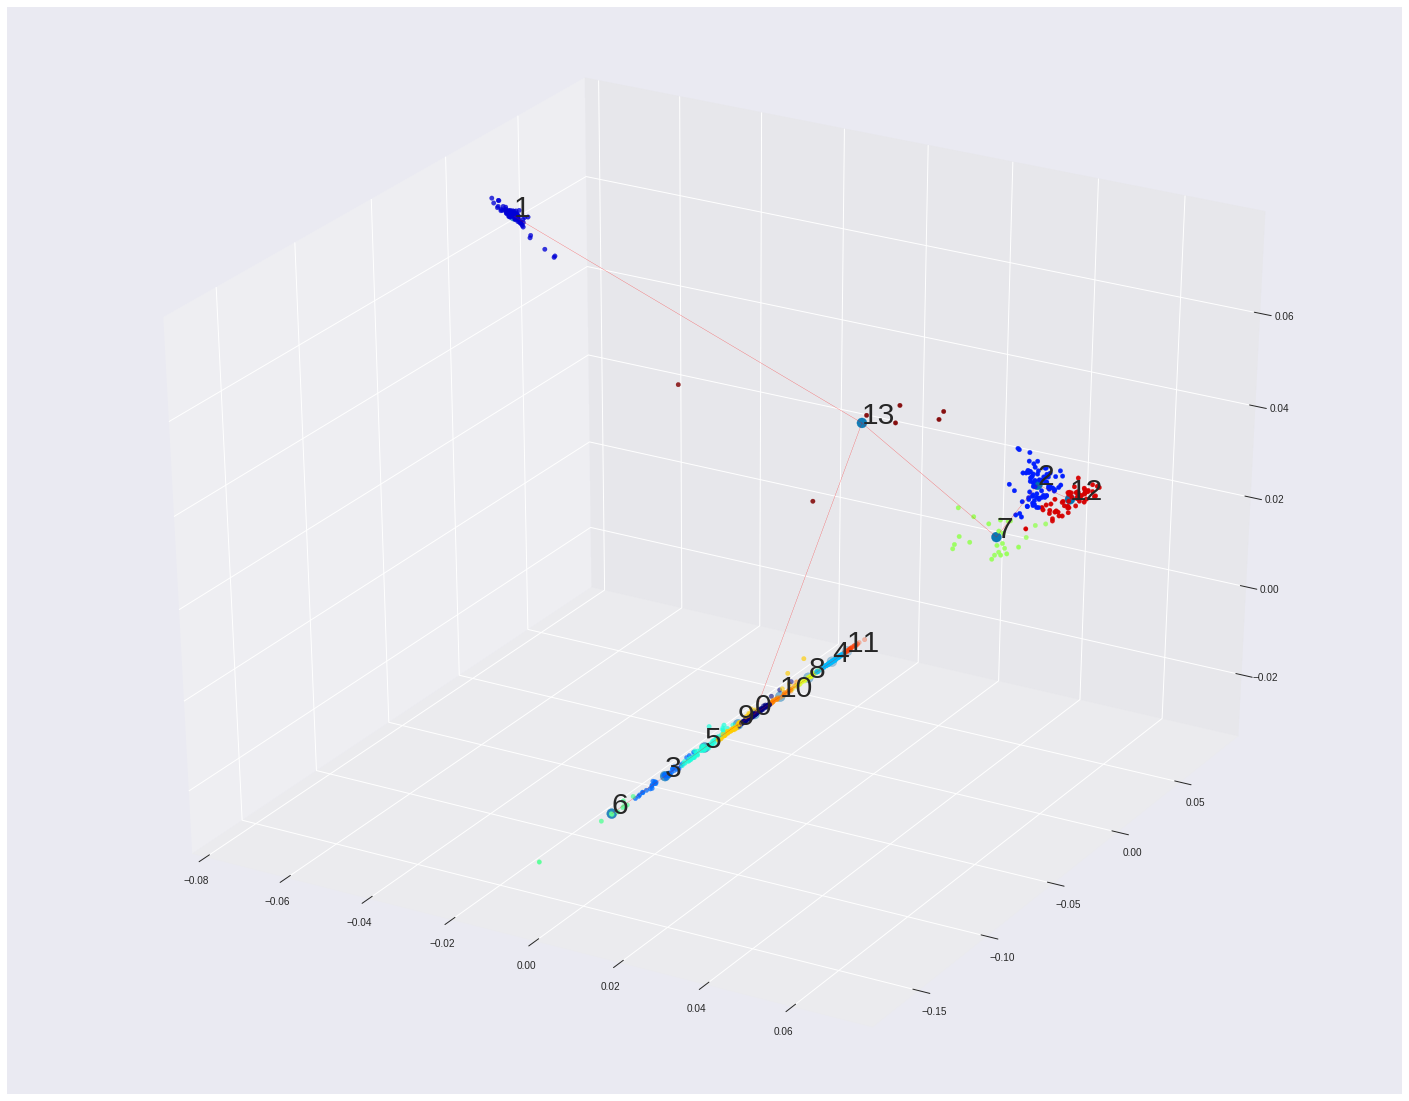

In [6]:
centroids,labels = Z.clustering(V,method='gmm',cov='tied',nclust=14)
# Tcsr,edges = Z.get_MST()
# branchs = Z.traj_centroids()
Z.plotD(V,dims=[1,2,0])

In [8]:
branches = [[1,13,2,12,7,11, 4, 8, 10, 0,9, 5, 3, 6]]

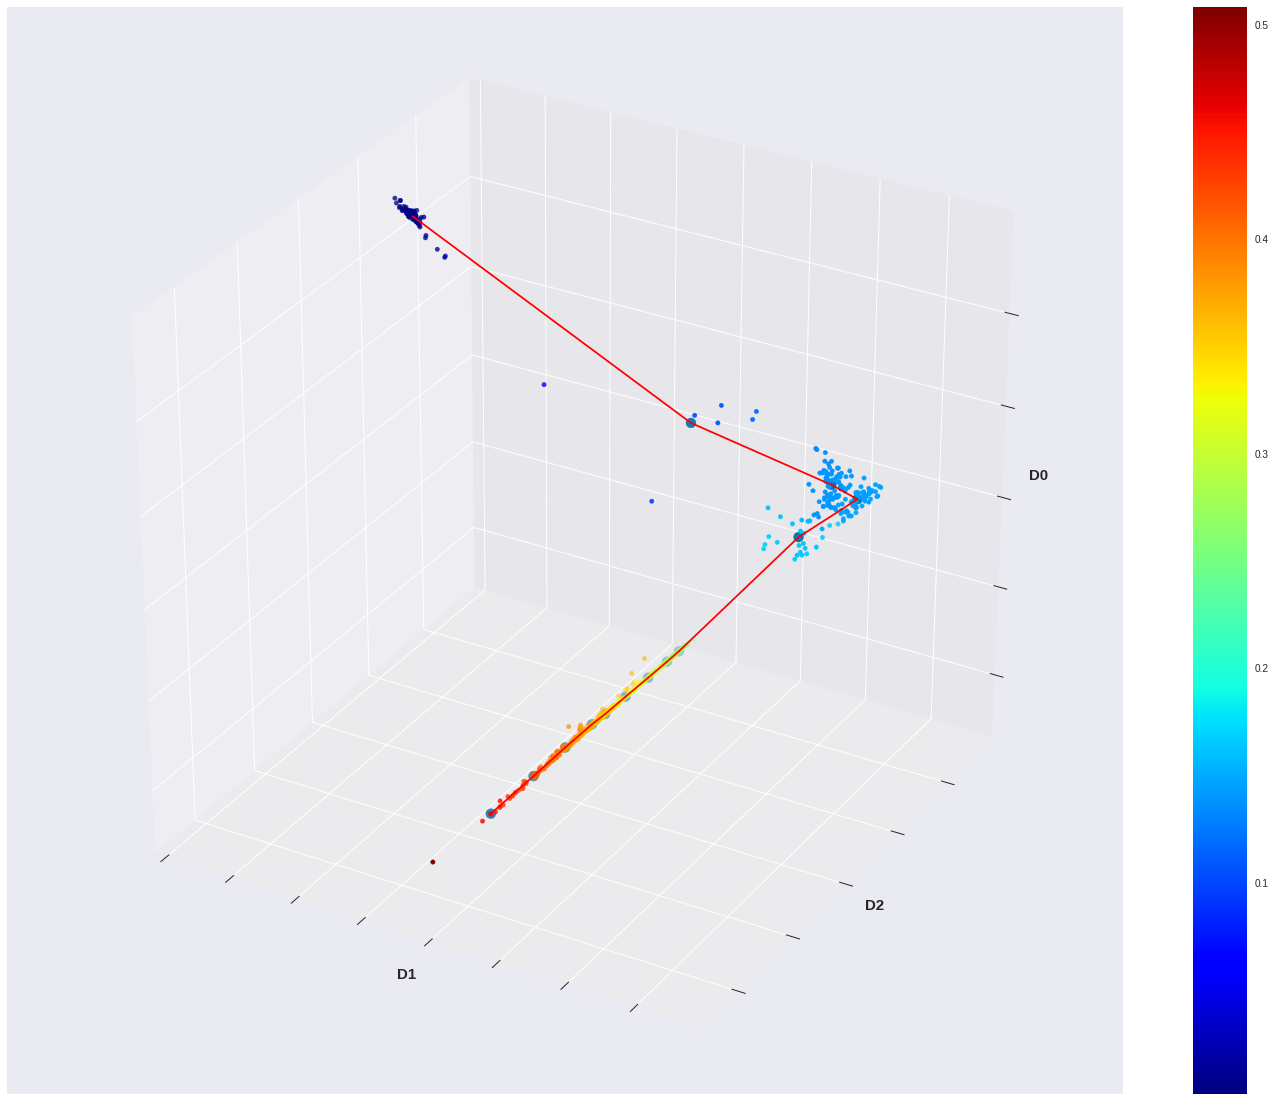

In [9]:
cell_scores,cell_order = Z.get_ordering(V,branches, method = 'wd',delta=0.05)
Z.plotT(V,cell_scores,dims=[1,2,0],plotlandmark=True)

In [11]:
cell_scores
order = sorted(range(len(cell_scores)), key=lambda k: cell_scores[k])
stage_order = [cell_stages[i] for i in order]
# print(order)

from scipy import stats
cor = stats.pearsonr(stage_order,cell_stages)[0]
print(cor)

0.950177838849
